### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk

### Importing the dataset

In [2]:
dataset=pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t',encoding='utf-8')
print(dataset)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


### Implementing NLP on dataset

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ', dataset['Review'][i])
    review=review.lower()
    review=review.split()
    ls=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    review=[ls.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)


In [4]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1566)
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,-1].values
len(x[0])


1566

In [6]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)


### Splitting into train and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=197)

### Implemeting PCA 

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
ev=pca.explained_variance_ratio_
len(ev)

850

### Training the model

In [9]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

model = SVC(kernel = 'linear',C=1, random_state = 197)

model.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=197)

In [10]:
y_pred = model.predict(x_test)

### Calculating the accuracy 

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[75  5]
 [ 9 61]]


0.9066666666666666

### Visulizing the confusion matrix

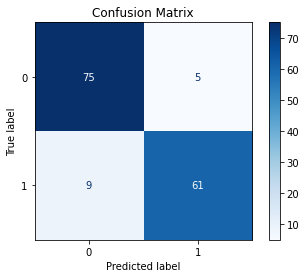

In [12]:
from sklearn.metrics import plot_confusion_matrix
display=plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=12)
plt.show()